This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur with updates by Ross Beveridge.

Last updated: August 31 2021

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


# Numpy

Numpy (Numerical Python) is Python's library for numerical data, and provides a wealth of functionality for working with array data.

Numpy features include:
  * A fast and efficient multidimensional array object ndarray
  * Functions for performing computations on arrays
  * Tools for reading and writing array-based datasets to disk
  * Linear algebra operations, and random number generation

This short tutorial is a brief introduction.  For more information please refer to one of the following resources:

* The Numpy [documentation](https://numpy.org/doc/stable/), which includes multiple tutorials.
* The [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake Vander Plas.

Numpy is going to be our primary Python programming tool for this course, and we will pick up more features as we go along.

Our first step is to **import** the package (note the "import as" shortcut):

In [45]:
import numpy as np

**Python note:**  Instead of the above import, we could have done ``from numpy import *``, which would have made every statement shorter by not having to write ``np.`` before each Numpy command.  That is not a good idea, as the Numpy namespace conflicts with built in Python functions like ``min`` or ``max``.

Arrays are the standard data containers in Numpy, and can have any number of dimensions.

Let's create a one dimensional array:

In [46]:
my_array = np.array([1, 2, 3])
my_array

array([1, 2, 3])

What have we gained over using a Python list?

In [47]:
my_list = [1, 2, 3]

In fact, Numpy arrays are less flexible than Python lists:

In [48]:
type(my_list[0])

int

In [49]:
my_list[0] = 'a'

try :
    my_array[0] = 'a'
except :
    print("wrong type in assignment")

wrong type in assignment


The reduced flexibility of Numpy arrays comes with improved efficiency both in terms of storage (why?) execution, and a wealth of functionality for fast manipulation of numeric data.

Furthermore, using Numpy's C API, libraries written in C or Fortran, can operate on the data stored in a NumPy array without needing to copy the data. 

Let's demonstrate the speed advantage of Numpy arrays:

In [50]:
import numpy as np
my_array = np.arange(1000000)
my_list = list(range(1000000))
# Note: why not simply do my_list = range(10000000)?

In [51]:
my_array[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
%timeit my_array2 = my_array * 2

1.87 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
%timeit my_list2 = [x * 2 for x in my_list]

57 ms ± 873 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


This clearly demonstrates the power of using Numpy arrays over Python lists.

**Note about timing Python code**
``%time`` is another magic command that can be used to measure the execution time of code snippets.  ``%timeit`` is usally preferred (see [this article](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) for more information about profiling Python code).

**Historical Note**

Often important ideas are older than you realize. For example, a highly flexible interpreted language with good list handling on top of an efficient heavy computational lifting language. One example from 40 years ago - [the UMass VISIONS system](https://books.google.com/books?id=ZuFRAwAAQBAJ&lpg=PA14&ots=5ka7NOCcRX&dq=UMass%20VISIONS%20system%20Lisp%20C&pg=PA14#v=onepage&q=UMass%20VISIONS%20system%20Lisp%20C&f=false)

### Numpy ndarrays

Numpy ndarrays enable you to perform mathematical operations on entire arrays in a single operation without requiring for loops.  This is called *vectorization*, and is key for writing efficient machine learning code.

For example:

In [54]:
data = np.array( [ [1,2,3], [4,5,6] ])
data

array([[1, 2, 3],
       [4, 5, 6]])

In [55]:
print(data * 10)    # multiply array by a scalar
print(data + data)  # add arrays


[[10 20 30]
 [40 50 60]]
[[ 2  4  6]
 [ 8 10 12]]


You can also perform Boolean operations on arrays:

In [56]:
a1 = np.array([[1., 2., 3.], [4., 5., 6.]])
a2 = np.array([[0., 4., 1.], [7., 2., 12.]])
a2 > a1

array([[False,  True, False],
       [ True, False,  True]])

Every array has a shape, which is a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array:


In [57]:
data.shape,data.dtype

((2, 3), dtype('int64'))

Note that Numpy inferred the type from the data that we provided.  You can check what happens if there are floats in the input to the array constructor.  The `dtype` attribute will tell you what kind of array got created.

In [58]:
arr1 = np.array([6, 7.5, 8, 0, 1])
print(arr1,arr1.dtype)
arr2 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(arr2,arr2.dtype)

[6.  7.5 8.  0.  1. ] float64
[[1 2 3 4]
 [5 6 7 8]] int64


In [59]:
print(arr1.shape, arr2.shape)

(5,) (2, 4)


Contrast this with the Python ``len`` builtin:

In [60]:
len(arr1), len(arr2)

(5, 2)

While it's clear what Numpy does when asked to add a scalar to an array or add two arrays of the same size, check what happens when adding two arrays of unequal size, e.g. add a one dimensional array to a two dimensional array

In [61]:
# define two arrays, one which is two dimensional with a shape (2,3), 
# and another which is one dimensional.
# what will its size need to be for the operation to work?
# what is Numpy doing in this case?


### Data types

Each array has a dtype associated with it, which is the type used to store the elements of the array.
The numerical dtypes are named as follows: a type name, like float or int, followed by a number indicating the number of bits per element. A standard double-precision floating-point value (what’s used under the hood in Python’s float object) takes up 8 bytes or 64 bits. Thus, this type is known in Numpy as ``float64``.



In [62]:
a1 = np.array([1, 2, 3], dtype=np.float64)
a2 = np.array([1, 2, 3], dtype=np.int32)
a1.dtype,a2.dtype

(dtype('float64'), dtype('int32'))

What would be the resulting data type for an array that contains strings and numbers?

In [63]:
# create an array that contains strings and 
# numbers and check its data type
foo = np.array([17, 'cat'])
foo

array(['17', 'cat'], dtype='<U21')

### Creating arrays

Numpy has plenty of ways for creating all kinds of arrays - initialized with zeros, ones, or random values.  Typically they have a `shape` argument that determines the size of the array in each dimension.

Here are some examples, and we'll start by creating an array of zeros:


In [64]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

An array of ones:

In [65]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

### Arrays of random numbers

Random numbers are very useful in machine learning!

We can create integers:

In [66]:
from numpy.random import default_rng
rng = default_rng(42)  # this creates an instance of a random number
                       # generator. its argument is called the "seed"
foo = rng.integers(1,7, size=(10,))
bar = rng.integers(1,7, size=(10,))
foo,bar

(array([1, 5, 4, 3, 3, 6, 1, 5, 2, 1]), array([4, 6, 5, 5, 5, 5, 4, 1, 6, 3]))

Random floating point numbers between 0 and 1:

In [67]:
rng.random(size=(3,3))  # you can also call it as rng.random((3,3))

array([[0.37079802, 0.92676499, 0.64386512],
       [0.82276161, 0.4434142 , 0.22723872],
       [0.55458479, 0.06381726, 0.82763117]])

Numpy can also generate random numbers with other distributions, e.g. the normal (aka Gaussian) distribution:

In [68]:
rng.standard_normal(size=(5,))

array([-0.04992591, -0.18486236, -0.68092954,  1.22254134, -0.15452948])

The following plot should convince us that `np.standard_normal` is working as advertised:

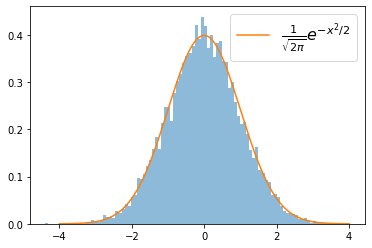

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

sample = rng.standard_normal(size=(10000,))
plt.hist(sample, 100, density=True, alpha=0.5);

x = np.linspace(-4, 4, 1000)

normal = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
normal
plt.plot(x,normal, label=r'$\frac{1}{\sqrt{2 \pi}}e^{-x^2/2}$');
plt.legend(fontsize='16');

**And About Randomness**

There is a something truly fundamental about the usefulness of what are called stochastic processes, in essences processes which incoporate randomness. So for the moment, here is the broadest advice. Embrace your understanding of randomness and realize the pratical value of that understanding will grow with your own experience.  There is the first obvious version of utility - characterizing behavior - often errors - with statistics. But the value goes deeper.  We will see later this semester [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent): an example of an algorithm made better by unpredictable behavior.

### Ranges

The Numpy equivalent of the `range` function, which provides fractional strides:

In [70]:
np.arange(2, 3, 0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

The `linspace` function provides similar functionality with a slightly different interface:

In [71]:
np.linspace(1., 4., 6)

array([1. , 1.6, 2.2, 2.8, 3.4, 4. ])

### Sidenote - getting **help** on python objects:

For getting help e.g. on the Numpy **linspace** function you can do one of the following:

```python
?np.linspace
```

or

```python
help(np.linspace)
```

In [72]:
# help(np.linspace)

### Array indexing and slicing

We'll begin with one dimensional arrays:

In [73]:
a = np.array([2,3,4])
print(a[0], a[1], a[2])
a[0] = 5                  # Change an element of the array
a

2 3 4


array([5, 3, 4])

Similarly to Python, you can use negative numbers to index arrays.  For example `a[-1]` is the last entry in an array:

In [74]:
a[-1]

4

In [75]:
a

array([5, 3, 4])

Can you explain what's happening in the following piece of code?

In [76]:
b = a
b[0] = 1234
print(a)
print(b)

[1234    3    4]
[1234    3    4]


The syntax for slices in Numpy is similar to slices of Python lists:

In [77]:
a = np.arange(10)
print(a)
a[5:8]

[0 1 2 3 4 5 6 7 8 9]


array([5, 6, 7])

You can assign values to a slice:

In [78]:
a[5:8] = 12
a

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Do slices create copies of the underlying data?  Let's see:

In [79]:
a_slice = a[5:8]
a_slice

array([12, 12, 12])

In [80]:
a_slice[1] = 12345
a

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

Numpy has been designed to be able to work with very large arrays, so eagerly copying data could cause severe performance and memory problems.

If you want a copy of a slice instead of a view, you will need to explicitly copy it using e.g. ``arr[5:8].copy()``.


### Two dimensional arrays

Let's look at two dimensional arrays.

In [81]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print(a[0, 0], a[0, 1])
print(a[0][0], a[0][1], a[1][0])

a.shape

1 2
1 2 5


(3, 4)

The latter form of indexing works, because each row of a two dimensional array is an array as well.

So, to access the first row:

In [82]:
row = a[0]    # the first row of a
row, row.shape

(array([1, 2, 3, 4]), (4,))

To access a column:

In [83]:
col = a[:, 0]
col, col.shape

(array([1, 5, 9]), (3,))

We can perform slicing on multiple dimensions, creating a submatrix:

In [84]:
submatrix = a[1:3, 1:4]
submatrix, submatrix.shape

(array([[ 6,  7,  8],
        [10, 11, 12]]),
 (2, 3))

### Fancy indexing

You can index an array using an integer array:


In [85]:
print(f'Matrix a is \n{a}')
a[ [0, 2] ]   # extract a given set of rows


Matrix a is 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [86]:
a[:, [0,2]]  # extract a given set of columns

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

**Question:** does indexing using an array create a copy of the array or simply a view, as in the case of slicing?

In [87]:
## write some code to answer this question

### Exercises

Think about the effect of each of the following slices:

In [88]:
a2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [89]:
a2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [90]:
a2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [91]:
a2d[-1, :2]

array([7, 8])

In [92]:
a2d[:, :]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Boolean indexing

In [98]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = rng.standard_normal(size=(7, 4))
(names,data)

(array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4'),
 array([[-1.18079003, -0.01080239,  1.00366249,  0.01996792],
        [-0.83022588, -1.24753846, -0.80959458,  0.39233375],
        [ 0.34360226, -0.8005071 , -2.21075942,  0.42001276],
        [-0.8977074 ,  0.68906248, -0.75610964, -0.98790045],
        [ 0.15317191,  2.35769923,  0.74902999,  0.1362193 ],
        [ 0.35885154, -1.75111586, -1.12234037, -2.51092887],
        [ 1.72987389,  1.52738603,  0.39281853,  0.1351151 ]]))

In [99]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [100]:
data[names == 'Bob']

array([[-1.18079003, -0.01080239,  1.00366249,  0.01996792],
       [-0.8977074 ,  0.68906248, -0.75610964, -0.98790045]])

In [101]:
cond = names == 'Bob'
print(~cond)
data[~cond]

[False  True  True False  True  True  True]


array([[-0.83022588, -1.24753846, -0.80959458,  0.39233375],
       [ 0.34360226, -0.8005071 , -2.21075942,  0.42001276],
       [ 0.15317191,  2.35769923,  0.74902999,  0.1362193 ],
       [ 0.35885154, -1.75111586, -1.12234037, -2.51092887],
       [ 1.72987389,  1.52738603,  0.39281853,  0.1351151 ]])

In [102]:
cond = (names == 'Bob') | (names == 'Will')
print(cond)
data[cond]

[ True False  True  True  True False False]


array([[-1.18079003, -0.01080239,  1.00366249,  0.01996792],
       [ 0.34360226, -0.8005071 , -2.21075942,  0.42001276],
       [-0.8977074 ,  0.68906248, -0.75610964, -0.98790045],
       [ 0.15317191,  2.35769923,  0.74902999,  0.1362193 ]])

**Note:** The Python keywords ``and`` and ``or`` do not work with boolean arrays. You need to use & (and) and | (or) instead.

We can use conditions to modify an array:

In [108]:
print(data < 0)
data[data < 0] = 0
data

[[ True  True False False]
 [ True  True  True False]
 [False  True  True False]
 [ True False  True  True]
 [False False False False]
 [False  True  True  True]
 [False False False False]]


array([[0.        , 0.        , 1.00366249, 0.01996792],
       [0.        , 0.        , 0.        , 0.39233375],
       [0.34360226, 0.        , 0.        , 0.42001276],
       [0.        , 0.68906248, 0.        , 0.        ],
       [0.15317191, 2.35769923, 0.74902999, 0.1362193 ],
       [0.35885154, 0.        , 0.        , 0.        ],
       [1.72987389, 1.52738603, 0.39281853, 0.1351151 ]])

In [53]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.51607608, 0.32060196, 0.59951699],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 1.05317807, 0.        ],
       [0.        , 0.52011223, 0.        , 0.        ]])

### Reshaping arrays

You can modify the shape of an array, even changing the number of dimensions:

In [116]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [119]:
a = np.arange(15).reshape((3, 5))
(a,a.shape)

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]),
 (3, 5))

Here's where it becomes interesting...

In [130]:
a = np.arange(15).reshape((-1, 5))
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

This is a neat trick:  -1 here means "as many rows as needed"

In [127]:
a.T, a.T.shape

(array([[ 0,  5, 10],
        [ 1,  6, 11],
        [ 2,  7, 12],
        [ 3,  8, 13],
        [ 4,  9, 14]]),
 (5, 3))

This is called the "transpose" of a matrix, and is also available as a function or method:

In [131]:
np.transpose(a)

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

### Universal Functions: Fast Element-Wise Array Functions

A universal function, or *ufunc*, is a function that performs element-wise operations on data in an ndarray. 


In [132]:
a = np.arange(5)
print(np.sqrt(a))
print(np.exp(a))
print(np.square(a))  # almost the same as a**2

[0.         1.         1.41421356 1.73205081 2.        ]
[ 1.          2.71828183  7.3890561  20.08553692 54.59815003]
[ 0  1  4  9 16]


A complete list of ufuncs is available in the [Numpy documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

### Stacking arrays

You can extend arrays by stacking them horizontally or vertically:

In [133]:
x = np.array( [[1,2],[3,4]] )
y = np.array( [[5,6],[7,8]] )
np.vstack([x,y]),np.hstack([x,y])

(array([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]]),
 array([[1, 2, 5, 6],
        [3, 4, 7, 8]]))

In machine learning vertical and horizontal stacking of arrays is used to add features or training examples to a feature matrix $X$.

### Avoid loops when you can

Consider the following piece of code:

In [60]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    x[i] = x[i] + v
x

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

As we know, loops are slow in python.  There is a much more efficient way of doing this:

In [136]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
x + v

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

This is called **broadcasting**.

### Mathematical  and statistical operations on arrays

Numpy provides functionality for a variety of mathematical operations over arrays:

* `np.sum` - sum
* `np.mean` - arithmetic mean
* `np.average` - average (can compute weighted averages)
* `np.std` - standard deviation
* `np.median` - median
* `np.max`, `np.min` - maximum/minimum
* `np.argmax`, `np.argmin` - index of maximum/minimum

And many [more](https://numpy.org/doc/stable/reference/routines.statistics.html).

Applying these methods to a two dimensional array computes the sum (or other operation) over the entire array:

In [137]:
a = rng.standard_normal(size=(4, 3))
print(a)
print(a.sum()) # same as np.sum(a) 

[[-1.55159    -0.21929996  1.79239188]
 [ 0.131416   -0.56464647 -1.75807066]
 [ 1.38030573 -0.0700838  -1.75673385]
 [-0.92426568 -1.27753802 -0.13174353]]
-4.9498583641654985


Sums can be performed along a given axis:

In [146]:
a

array([[-1.55159   , -0.21929996,  1.79239188],
       [ 0.131416  , -0.56464647, -1.75807066],
       [ 1.38030573, -0.0700838 , -1.75673385],
       [-0.92426568, -1.27753802, -0.13174353]])

In [148]:
a.sum(axis=0)

array([-0.96413396, -2.13156824, -1.85415616])

This can seem a bit confusing, but think about the axis keyword as determining the axis that remains as a result of performing the operation.  It's NOT the axis over which the operation is performed!

In [64]:
a.sum(axis=0)

array([-2.7709238 , -2.65945394,  0.51973905])

In [149]:
big_array = rng.random(size=(1000000,))
big_list = list(big_array)
%timeit sum(big_list)
%timeit np.sum(big_array)

76.1 ms ± 3.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
313 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Numpy as a tool for expressing mathematical formulas

One of the great advantages of using Numpy is that many of the mathematical formulas that are common in machine learning can be succinctly expressed in Numpy.  Consider for example the computation of the mean-squared error which is used to quantify the quality of a regression method:

$$
\mathrm{MSE} = \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - y_i)^2,
$$

where $y_1,\ldots,y_N$ are the given labels and $\hat{y}_1,\ldots,\hat{y}_N$ are the predicted labels.

This formula is easy to express using a single line of code:

In [150]:
y = np.array([1, 1.5, 2])
y_pred = np.array([0.8, 1.6, 2.4])

(1/len(y)) * np.sum( (y - y_pred)**2 )

# alternative:  (1/len(y)) * np.sum( np.square(y - y_pred))


0.06999999999999997

### Exercise

* Compute the accuracy of a machine learning classifier.  In this case the labels are discrete, and the error is expressed as:
$$
\mathrm{accuracy} = \frac{1}{N}\sum_{i=1}^N [\hat{y}_i = y_i].
$$
Here the notation $[\mathrm{condition}]$ is the [Iverson bracket](https://en.wikipedia.org/wiki/Iverson_bracket), which is equal to 1 if the condition is true, and 0 otherwise.

In [155]:
y = np.array([0, 1, 1, 1, 0])
y_pred = np.array([1, 0, 1, 1, 0])
# accuracy = ...


0.6

For your reference here is a pure Python implementation:

In [68]:
accuracy = sum([ y[i]==y_pred[i] for i in range(len(y)) ]) / len(y)
accuracy

0.6

### Example:  Random Walks

A random walk in one dimension is a random process where at each step the walker takes a step either to the left or to the right.  Random walks have interesting statistical properties that can be investigated by simulating them.

In [69]:
import random

walk_length = 1000

def random_walk(n):
    """Return a list of positions in a random walk"""
    position = 0
    walk = [position]
    for i in range(n):
        position += 2*random.randint(0, 1) - 1
        walk.append(position)
    return walk

walk = random_walk(walk_length)

In [70]:
%timeit random_walk(walk_length)

1.34 ms ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Here's a much more efficient Numpy version:

In [71]:
rng = default_rng(8)

def random_walk_vectorized(n):
    steps = rng.choice([-1,+1], n)
    return np.cumsum(steps)

walk = random_walk_vectorized(walk_length)

In [72]:
%timeit random_walk_vectorized(walk_length)

38.2 µs ± 577 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Note how much work is done by [np.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)

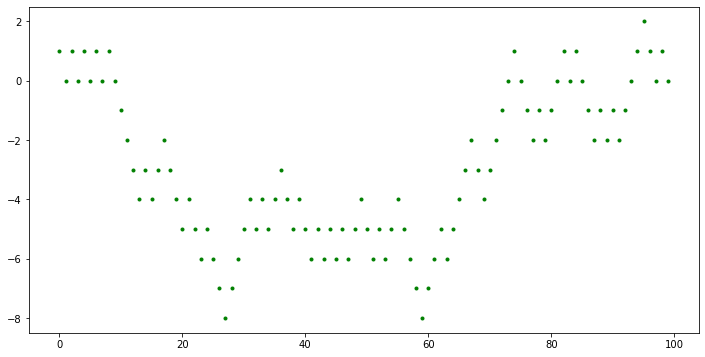

In [73]:
num_steps = 100
distance = random_walk_vectorized(num_steps)
t = np.arange(num_steps)
plt.figure(figsize=(12,6))
plt.plot(t, distance, 'g.')